# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import os
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [2]:
# data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "liver2.csv")
data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "case_duration_all.csv")

df = pd.read_csv(data_path)

c:\users\liuda\anaconda3\envs\lp_pyomo\lib\site-packages\IPython\core\interactiveshell.py:3221: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df['Primary Procedure CPT Code']=df['Primary Procedure CPT Code'].str.replace('\D+','')
df = df.dropna() # drop cases without all information
limit = 480
df=df[df['Actual Room Duration']<limit]
bmi_limit = 80
df=df[df['BMI']<bmi_limit]
height_limit = 100
df=df[df['Height (cm)']>height_limit]
df['Primary Procedure CPT Code']=df['Primary Procedure CPT Code'].astype(int)

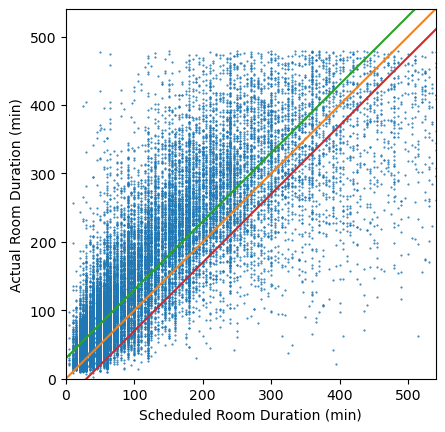

In [30]:
plt.plot(df['Scheduled Room Duration'],df['Actual Room Duration'],'.', MarkerSize = 1)
plt.gca().set_aspect('equal')
plt.plot((0, 1000), (0, 1000))
plt.plot((0, 1000), (30, 1030))
plt.plot((0, 1000), (-30, 970))
plt.xlim(0, limit+60)
plt.ylim(0, limit+60)
plt.xlabel('Scheduled Room Duration (min)')
plt.ylabel('Actual Room Duration (min)')
plt.show()

In [34]:
diff = df['Scheduled Room Duration']-df['Actual Room Duration']
over = diff[diff>30].count()/diff.count()
under = diff[diff<-30].count()/diff.count()
good = 1 - over - under

In [32]:
diff.count()

37053

Text(0.5, 0, 'Age (years)')

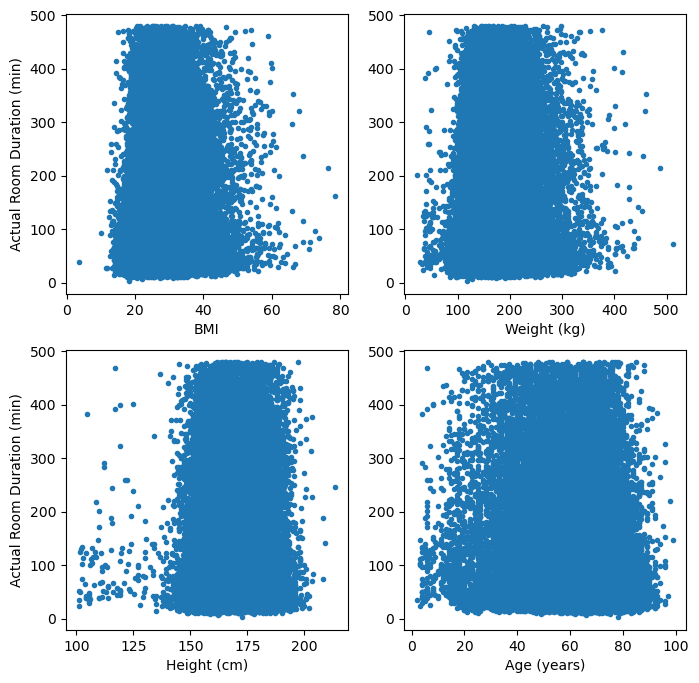

In [6]:
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0,0].plot(df['BMI'],df['Actual Room Duration'],'.')
axs[0,0].set_xlabel('BMI')
axs[0,0].set_ylabel('Actual Room Duration (min)')
axs[0,1].plot(df['Weight (kg)'],df['Actual Room Duration'],'.')
axs[0,1].set_xlabel('Weight (kg)')
axs[1,0].plot(df['Height (cm)'],df['Actual Room Duration'],'.')
axs[1,0].set_xlabel('Height (cm)')
axs[1,0].set_ylabel('Actual Room Duration (min)')
axs[1,1].plot(df['Age at Surgery'],df['Actual Room Duration'],'.')
axs[1,1].set_xlabel('Age (years)')

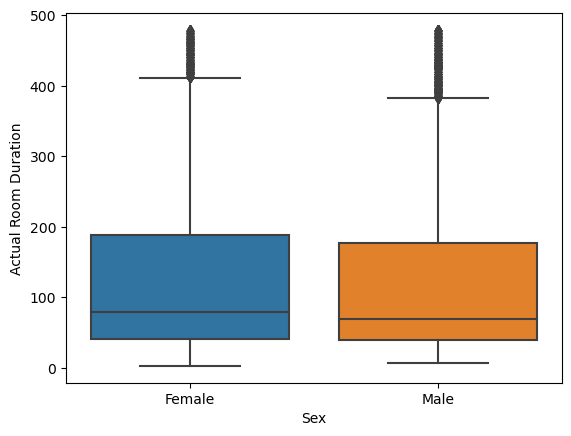

In [7]:
sb.boxplot( x = 'Sex',y = 'Actual Room Duration', data = df )

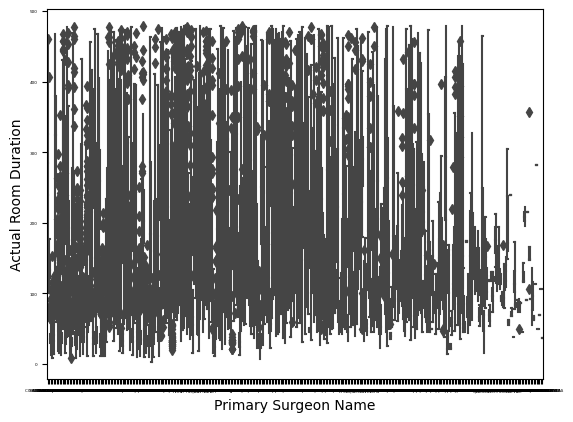

In [8]:
b = sb.boxplot( x = 'Primary Surgeon Name',y = 'Actual Room Duration', data = df )
b.tick_params(labelsize=3)

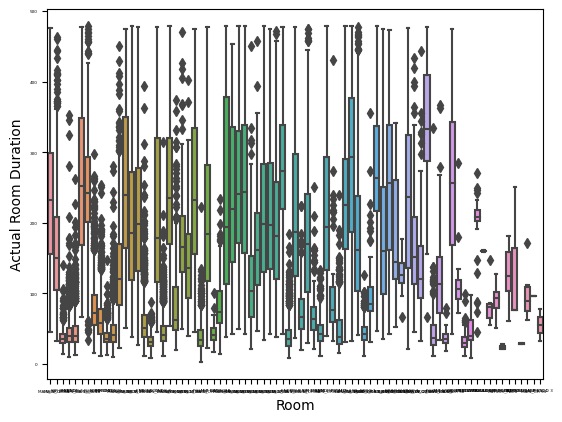

In [9]:
b = sb.boxplot(x = 'Room',y = 'Actual Room Duration', data = df )
b.tick_params(labelsize=3)

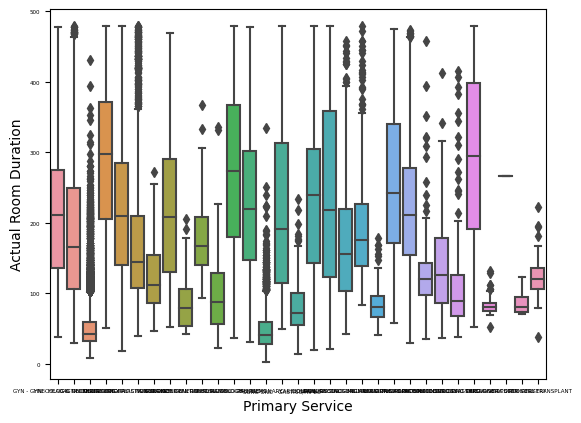

In [10]:
b = sb.boxplot(x = 'Primary Service',y = 'Actual Room Duration', data = df )
b.tick_params(labelsize=4)

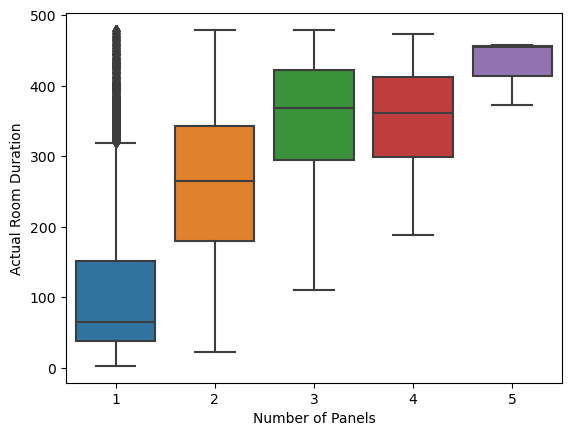

In [11]:
b = sb.boxplot(x = 'Number of Panels',y = 'Actual Room Duration', data = df )

In [12]:
features_to_encode = ['Primary Surgeon Name', 'Primary Service', 'Sex', 'Room']
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )

In [13]:
# X = df[['Primary Surgeon Name', 'Primary Service', 'Sex','Room','Number of Panels','Scheduled Room Duration', 'BMI', 'Age at Surgery', 'Height (cm)','Weight (kg)']]
# X = df[['Primary Surgeon Name', 'Primary Service', 'Sex','Room','Number of Panels','Scheduled Room Duration', 'BMI', 'Age at Surgery', 'Height (cm)','Weight (kg)', 'Primary Procedure CPT Code']]
X = df[['Primary Surgeon Name', 'Primary Service', 'Sex','Room','Number of Panels', 'BMI', 'Age at Surgery', 'Height (cm)','Weight (kg)', 'Primary Procedure CPT Code']]
y = df['Actual Room Duration']

In [14]:
# model = LinearRegression()
model = GradientBoostingRegressor()
pipe = make_pipeline(col_trans, model)
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Primary Surgeon Name',
                                                   'Primary Service', 'Sex',
                                                   'Room'])],
                                   verbose=...
  

In [15]:
y_pred = pipe.predict(X)

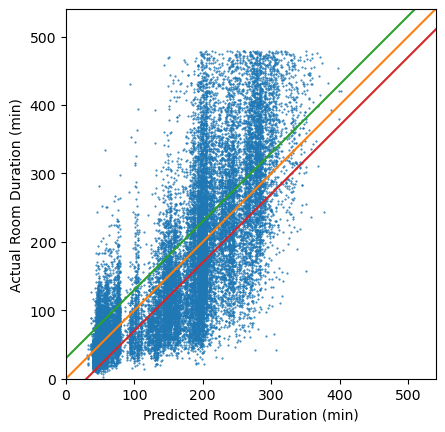

In [16]:
plt.plot(y_pred,y,'.', MarkerSize=1)
plt.gca().set_aspect('equal')
plt.plot((0, 1000), (0, 1000))
plt.plot((0, 1000), (30, 1030))
plt.plot((0, 1000), (-30, 970))
plt.xlim(0, limit+60)
plt.ylim(0, limit+60)
plt.xlabel('Predicted Room Duration (min)')
plt.ylabel('Actual Room Duration (min)')
plt.show()

In [17]:
y

10         330.0
25         137.0
35          35.0
39          34.0
117         26.0
           ...  
1048501     86.0
1048521    176.0
1048536     88.0
1048541     38.0
1048558     46.0
Name: Actual Room Duration, Length: 37053, dtype: float64

In [18]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X, features_to_encode)

In [19]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X, features_to_encode)

In [20]:
feature_importances = list(zip(X_train_encoded, model.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: Primary Service_GASTROENTEROLOGY    Importance: 0.5248482796304188
Feature: Primary Service_PULMONARY           Importance: 0.17511791643640334
Feature: Primary Procedure CPT Code          Importance: 0.12001028167840434
Feature: Number of Panels                    Importance: 0.07260507804440561
Feature: Primary Service_NEUROSURGERY        Importance: 0.024169379818360412
Feature: Room_MAYS_OR 01                     Importance: 0.00761936639306918
Feature: Primary Service_UROLOGY             Importance: 0.006980462544051793
Feature: Room_MAIN_OR 20                     Importance: 0.00582986621696732
Feature: Room_MAIN_OR 31_ROBOTIC             Importance: 0.004834713494498844
Feature: Room_FLUORO 1                       Importance: 0.004635208672165549
Feature: Primary Service_RADIATION ONCOLOGY  Importance: 0.0033710341264735666
Feature: Primary Service_THRCV - THORACIC SURGERY Importance: 0.0032713937683204945
Feature: Primary Service_CARDIOLOGY          Importance: 0.00321

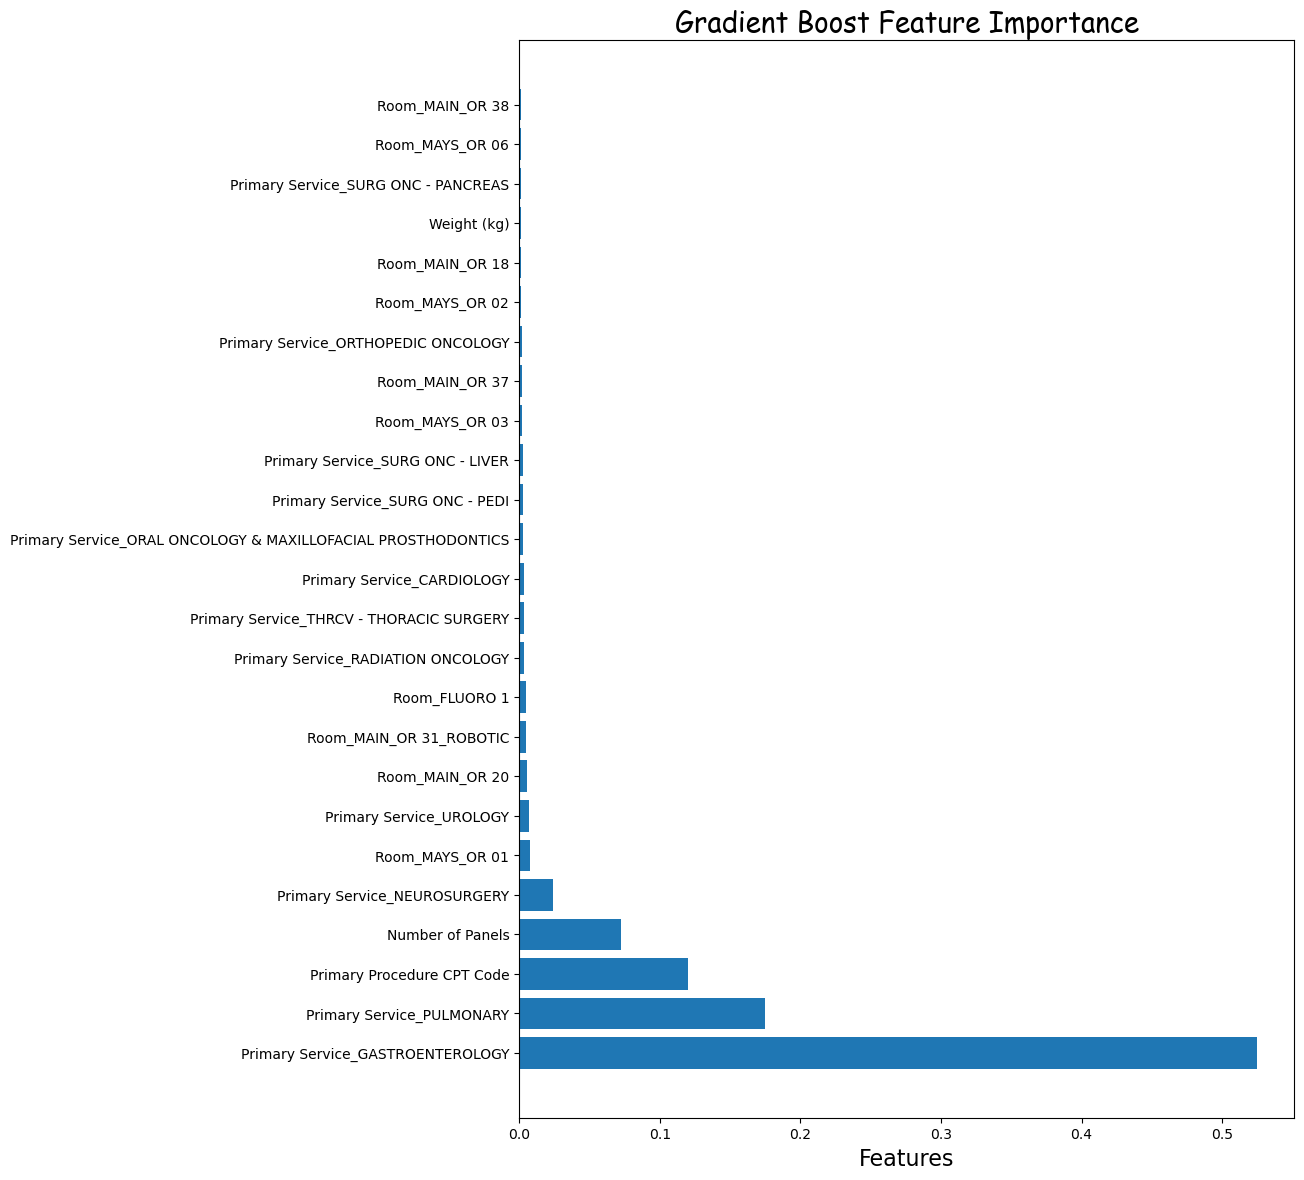

In [21]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Gradient Boost Feature Importance',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()